In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./weatherHistory.csv')[['Formatted Date', 'Temperature (C)']].rename(columns={'Formatted Date': 'Date', 'Temperature (C)': 'Temperature'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         96453 non-null  object 
 1   Temperature  96453 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [3]:
df['Date'] = pd.date_range(start='2006-04-01', periods=96453, freq='H')
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-04-01 00:00:00 to 2017-04-01 20:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  96453 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


## Time Series Plot

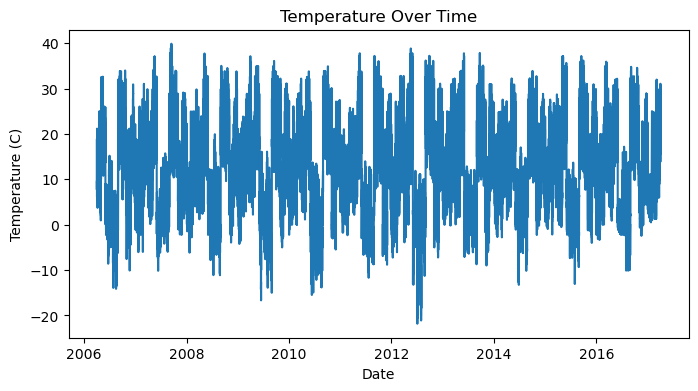

In [4]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

For a time series to be considered stationary:
- Constant mean
- Constant variance
- No seasonality

## Time Series Decomposition

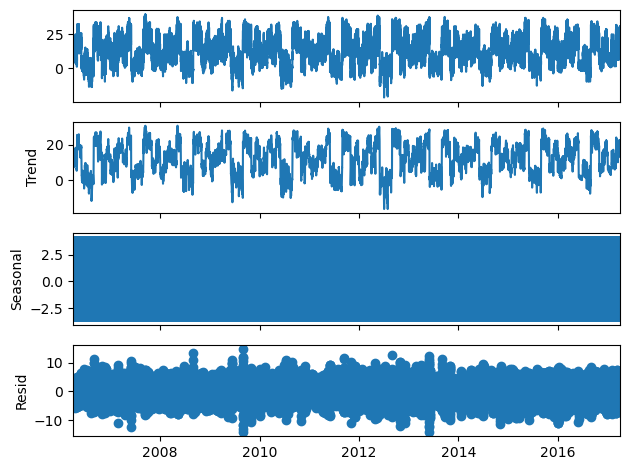

In [5]:
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

## Stationary test

In [6]:
def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

- If the p-value is less than 0.05, we can reject the null hypothesis (H0), which indicates that the series is stationary.
- If the p-value is greater than 0.05, we fail to reject H0, indicating that the series is not stationary.

In [7]:
adf_test(df['Temperature'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.014008e+01
p-value                        8.465720e-18
#Lags Used                     6.700000e+01
Number of Observations Used    9.638500e+04
Critical Value (1%)           -3.430418e+00
Critical Value (5%)           -2.861570e+00
Critical Value (10%)          -2.566786e+00
dtype: float64


- If the series is stationary, there is a strong indication that we can use the past to predict the future.
- If the series is not stationary, we can try to transform it (for example, using differencing) to make it stationary and then use the past to predict the future.